In [1]:
%load_ext autoreload

In [6]:
%autoreload 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

import utilities as ut

from scipy.stats import sem
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.model_selection import train_test_split

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

### Load FE data


In [3]:
X_train = pd.read_csv('X_train_selected.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test_selected.csv')

In [4]:
# set date_foercast as index
X_train.set_index('date_forecast', inplace=True)
y_train.set_index('date_forecast', inplace=True)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y_train, train_size=0.90, random_state=42)

## Train and fit model

In [ ]:
params = {
        'n_estimators': [50,100,150,200,300,500],
        'max_depth': [None, 3, 5, 7, 9],
        'eta': [0.5, 1, 2, 3]
        }
grid_search = GridSearchCV(XGBRFRegressor(), params, n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, Y_train)

In [ ]:
print("Test  Accuracy Score : %.2f"%grid_search.score(X_test, Y_test))
print("Train Accuracy Score : %.2f"%grid_search.score(X_train, Y_train))

print("Best Params : ", grid_search.best_params_)
print("Feature Importances : ")

>1 mean=-90.1730 se=0.834
>2 mean=-90.0613 se=0.519
>3 mean=-89.9989 se=0.403
>4 mean=-90.0478 se=0.350
>5 mean=-90.0448 se=0.334
>6 mean=-90.0397 se=0.292
>7 mean=-90.0465 se=0.257
>8 mean=-90.0821 se=0.240
>9 mean=-90.0907 se=0.221
>10 mean=-90.0583 se=0.207
>11 mean=-90.0804 se=0.198
>12 mean=-90.1121 se=0.191
>13 mean=-90.1238 se=0.181
>14 mean=-90.1054 se=0.180
>15 mean=-90.1354 se=0.171


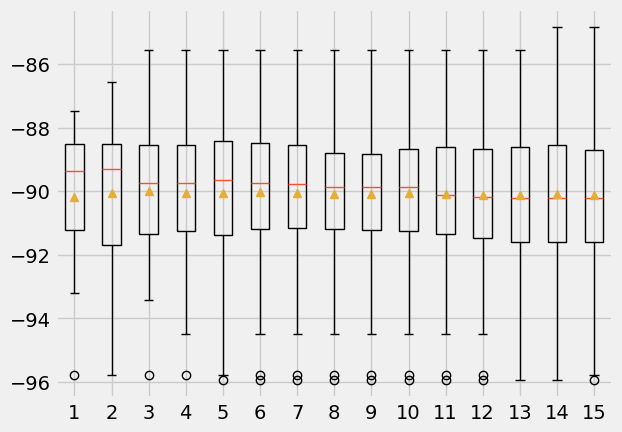

In [16]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, model, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

repeats = range(1,16)
results = list()

for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X_train, y_train, model, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), sem(scores)))
    # store
    results.append(scores)
# plot the results
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

### Make prediction